| Heading | Title |
| ----------- | ----------- |
| Name | Rakshit Deshmukh |
| Class | D17A |
| Roll Number | 16 |
| Subject | ADS Lab |
| Experiment | 2 |

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SEM VIII/ADS/Experiment 2/AAPL.csv')

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.6225,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.5625,7.571429,7.466071,7.520714,NaN,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [ ]:
df.dtypes

Date          object
Open          object
High          object
Low          float64
Close         object
Adj Close    float64
Volume        object
dtype: object

In [ ]:
df.duplicated().sum()

5

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.replace(r'([A-Za-z]|\*)', np.NaN, regex=True)

In [ ]:
df.isna().sum()

Date         0
Open         2
High         1
Low          0
Close        3
Adj Close    3
Volume       3
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(df.iloc[:,1:])
df.iloc[:,1:] = imp.transform(df.iloc[:,1:])

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# 493729600 = 49.3729600 * 10^7

df['Volume'] = df['Volume'] / 10000000

df.rename(columns = {'Volume':'Volume (10^8)'}, inplace = True)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume (10^8)
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,51.323297,51.889888,50.742408,51.321978,49.516522,25.657844
std,47.340920,47.952381,46.747966,47.339702,47.823632,22.265035
min,6.870357,7.000000,6.794643,6.858929,5.846675,3.519590
25%,18.962144,19.108035,18.778838,18.956875,16.627215,10.247542
50%,29.809999,30.011249,29.576250,29.909999,27.546022,16.713040
75%,56.986249,57.339999,56.490000,56.763124,55.039802,34.584650
max,182.630005,182.940002,179.119995,182.009995,180.959732,188.099800


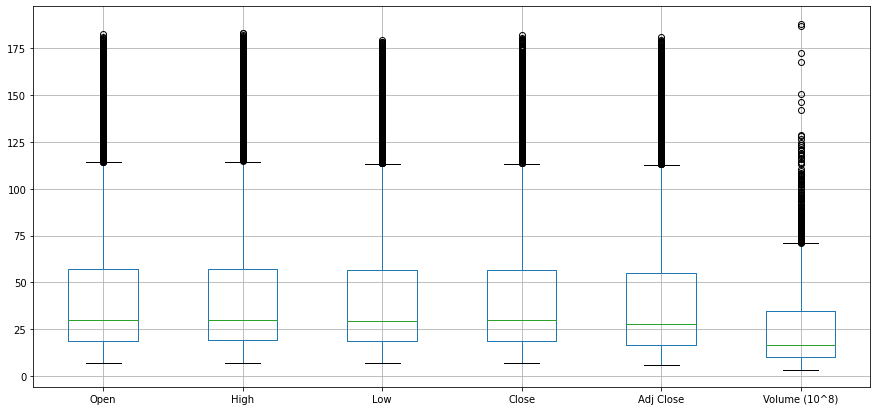

In [ ]:
df.boxplot(figsize=(15, 7))